### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import *

### Importing the dataset

In [2]:
df = pd.read_excel("seating_data.xlsx")
relationship_df = df.set_index("idx")

In [3]:
# Normalize to 0-based indexing
relationship_df.columns = relationship_df.columns.astype(int) - 1
relationship_df.index = relationship_df.index - 1
relationship_matrix = relationship_df.to_numpy()

### Constant Definition

In [4]:
POP_SIZE = 250
NUM_GENERATIONS = 3000
MUT_PROB = 0.1
ELITE_SIZE = 0 #No Elitism in the beggining
GUEST_LIST = list(range(64))
BEST_SCORE = 0
Iteration_Number = 20

In [5]:
#We needed to put the wrapper to use it because this mutation use relationship matrix
def greedy_wrapper(repr, mut_prob):
    return greedy_local_replacement_mutation(repr, relationship_matrix, mut_prob)

## Swap Mutation

### Genetic Algorythm with no Elitism and table-based crossover

--- Run 1 ---
Generation 0: Best fitness = 31800
Generation 10: Best fitness = 28400
Generation 20: Best fitness = 29600
Generation 30: Best fitness = 28400
Generation 40: Best fitness = 28800
Generation 50: Best fitness = 29300
Generation 60: Best fitness = 28500
Generation 70: Best fitness = 28600
Generation 80: Best fitness = 33500
Generation 90: Best fitness = 33800
Generation 100: Best fitness = 38900
Generation 110: Best fitness = 34600
Generation 120: Best fitness = 32300
Generation 130: Best fitness = 30800
Generation 140: Best fitness = 33100
Generation 150: Best fitness = 33400
Generation 160: Best fitness = 34600
Generation 170: Best fitness = 31300
Generation 180: Best fitness = 36400
Generation 190: Best fitness = 32800
Generation 200: Best fitness = 37000
Generation 210: Best fitness = 34500
Generation 220: Best fitness = 35300
Generation 230: Best fitness = 36500
Generation 240: Best fitness = 35400
Generation 250: Best fitness = 38300
Generation 260: Best fitness = 3340

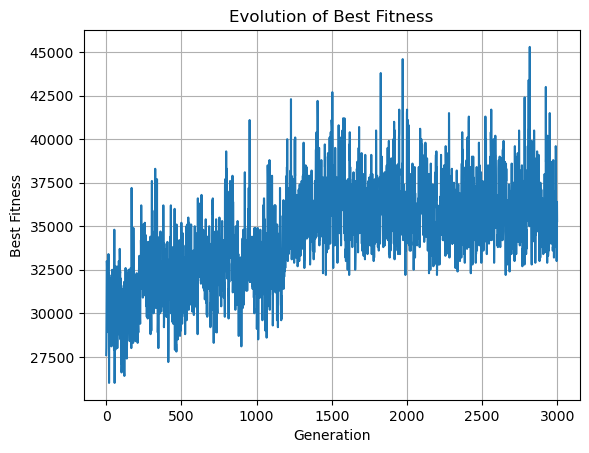


Best seating plan:
Table 1: [54, 2, 6, 51, 43, 63, 42, 37]
Table 2: [17, 26, 1, 16, 25, 5, 0, 27]
Table 3: [12, 44, 7, 58, 52, 13, 15, 48]
Table 4: [59, 38, 31, 46, 57, 32, 40, 56]
Table 5: [39, 29, 4, 18, 10, 11, 62, 28]
Table 6: [50, 55, 35, 20, 14, 41, 19, 3]
Table 7: [22, 60, 30, 61, 8, 23, 21, 47]
Table 8: [49, 45, 53, 36, 33, 34, 24, 9]
Best fitness across 20 runs: 40900


In [ ]:
for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=swap_mutation,
        crossover_fn=crossover_table_based,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=tournament_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    #Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")

### Start using Elitism in the table-based crossover

--- Run 1 ---
Generation 0: Best fitness = 28600
Generation 10: Best fitness = 34500
Generation 20: Best fitness = 39300
Generation 30: Best fitness = 41500
Generation 40: Best fitness = 42200
Generation 50: Best fitness = 44500
Generation 60: Best fitness = 45000
Generation 70: Best fitness = 49500
Generation 80: Best fitness = 49500
Generation 90: Best fitness = 49600
Generation 100: Best fitness = 49600
Generation 110: Best fitness = 49600
Generation 120: Best fitness = 51000
Generation 130: Best fitness = 51000
Generation 140: Best fitness = 52100
Generation 150: Best fitness = 53800
Generation 160: Best fitness = 53800
Generation 170: Best fitness = 53800
Generation 180: Best fitness = 53800
Generation 190: Best fitness = 53800
Generation 200: Best fitness = 53800
Generation 210: Best fitness = 53800
Generation 220: Best fitness = 55600
Generation 230: Best fitness = 55600
Generation 240: Best fitness = 55600
Generation 250: Best fitness = 55600
Generation 260: Best fitness = 5560

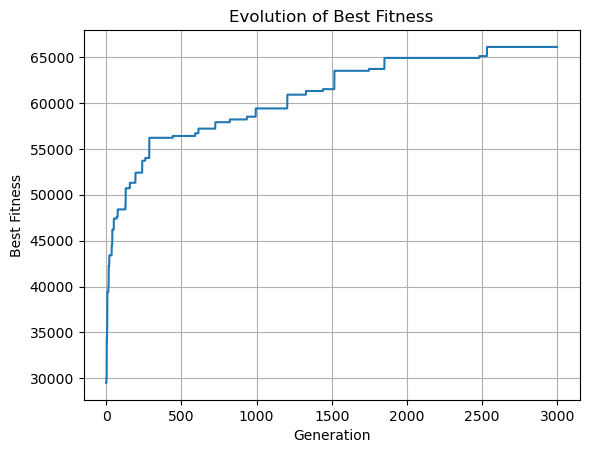


Best seating plan:
Table 1: [40, 35, 9, 39, 41, 42, 8, 34]
Table 2: [46, 47, 24, 17, 21, 23, 22, 31]
Table 3: [32, 51, 38, 50, 62, 60, 63, 61]
Table 4: [58, 12, 36, 45, 10, 13, 14, 2]
Table 5: [3, 43, 53, 37, 1, 7, 0, 6]
Table 6: [15, 27, 48, 16, 26, 18, 5, 25]
Table 7: [33, 11, 19, 20, 44, 4, 59, 52]
Table 8: [30, 56, 28, 54, 55, 57, 49, 29]
Best fitness across 20 runs: 72200


In [ ]:
ELITE_SIZE = int(0.02 * POP_SIZE) #2% of the population passes

for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=swap_mutation,
        crossover_fn=crossover_table_based,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=tournament_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    #Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")

### No Elitism with Uniform crossover

--- Run 1 ---
Generation 0: Best fitness = 26200
Generation 10: Best fitness = 27600
Generation 20: Best fitness = 28400
Generation 30: Best fitness = 30100
Generation 40: Best fitness = 35400
Generation 50: Best fitness = 32800
Generation 60: Best fitness = 34400
Generation 70: Best fitness = 37800
Generation 80: Best fitness = 41100
Generation 90: Best fitness = 41400
Generation 100: Best fitness = 41300
Generation 110: Best fitness = 44700
Generation 120: Best fitness = 46200
Generation 130: Best fitness = 47200
Generation 140: Best fitness = 47500
Generation 150: Best fitness = 52400
Generation 160: Best fitness = 49500
Generation 170: Best fitness = 49700
Generation 180: Best fitness = 52500
Generation 190: Best fitness = 54200
Generation 200: Best fitness = 56000
Generation 210: Best fitness = 54800
Generation 220: Best fitness = 54100
Generation 230: Best fitness = 58200
Generation 240: Best fitness = 59900
Generation 250: Best fitness = 59100
Generation 260: Best fitness = 5980

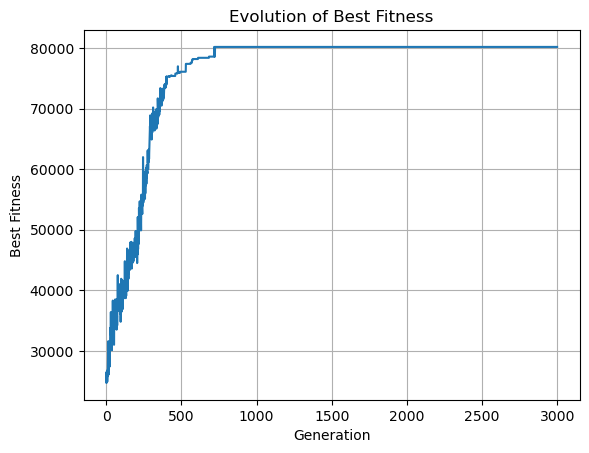


Best seating plan:
Table 1: [1, 0, 9, 2, 7, 6, 8, 3]
Table 2: [50, 51, 52, 56, 57, 30, 28, 29]
Table 3: [32, 31, 10, 12, 11, 13, 36, 14]
Table 4: [27, 23, 24, 22, 59, 4, 26, 25]
Table 5: [40, 39, 41, 42, 55, 54, 53, 38]
Table 6: [46, 47, 48, 45, 35, 34, 44, 33]
Table 7: [61, 60, 62, 63, 37, 43, 58, 49]
Table 8: [15, 20, 17, 16, 21, 5, 18, 19]
Best fitness across 20 runs: 80500


In [ ]:
ELITE_SIZE = 0

for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=swap_mutation,
        crossover_fn=uniform_guest_crossover,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=tournament_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    #Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")

### Start using elitism with uniform crossover

--- Run 1 ---
Generation 0: Best fitness = 24900
Generation 10: Best fitness = 28700
Generation 20: Best fitness = 31900
Generation 30: Best fitness = 33400
Generation 40: Best fitness = 37200
Generation 50: Best fitness = 41500
Generation 60: Best fitness = 43100
Generation 70: Best fitness = 49400
Generation 80: Best fitness = 51800
Generation 90: Best fitness = 51800
Generation 100: Best fitness = 51800
Generation 110: Best fitness = 51800
Generation 120: Best fitness = 55000
Generation 130: Best fitness = 55000
Generation 140: Best fitness = 62700
Generation 150: Best fitness = 65600
Generation 160: Best fitness = 70200
Generation 170: Best fitness = 70200
Generation 180: Best fitness = 70200
Generation 190: Best fitness = 70800
Generation 200: Best fitness = 70800
Generation 210: Best fitness = 70800
Generation 220: Best fitness = 71400
Generation 230: Best fitness = 72800
Generation 240: Best fitness = 72800
Generation 250: Best fitness = 72800
Generation 260: Best fitness = 7280

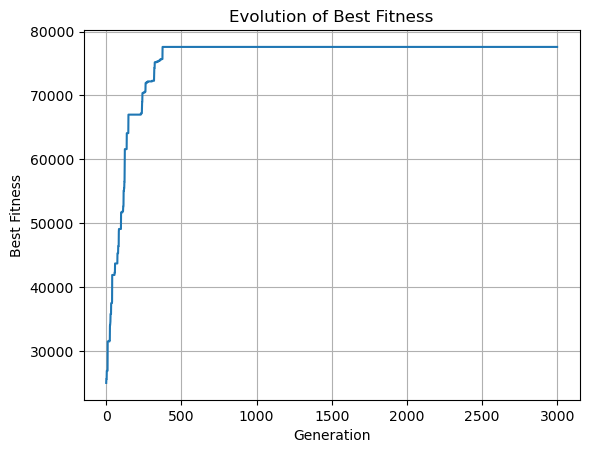


Best seating plan:
Table 1: [40, 63, 41, 42, 62, 60, 39, 61]
Table 2: [1, 0, 9, 2, 3, 6, 8, 7]
Table 3: [34, 35, 45, 32, 33, 10, 31, 11]
Table 4: [22, 16, 24, 23, 15, 17, 4, 21]
Table 5: [18, 47, 48, 46, 20, 55, 19, 54]
Table 6: [43, 37, 27, 25, 59, 5, 26, 49]
Table 7: [29, 28, 44, 30, 14, 12, 38, 13]
Table 8: [50, 56, 36, 58, 53, 51, 52, 57]
Best fitness across 20 runs: 80500


In [ ]:
ELITE_SIZE = int(0.02 * POP_SIZE) #2% of the population passes

for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=swap_mutation,
        crossover_fn=uniform_guest_crossover,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=tournament_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    #Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")

## Inter Table Swap Mutation

### No Elitism combined with table-based crossover

--- Run 1 ---
Generation 0: Best fitness = 25900
Generation 10: Best fitness = 30800
Generation 20: Best fitness = 29100
Generation 30: Best fitness = 28200
Generation 40: Best fitness = 30800
Generation 50: Best fitness = 33300
Generation 60: Best fitness = 29300
Generation 70: Best fitness = 27900
Generation 80: Best fitness = 27100
Generation 90: Best fitness = 28300
Generation 100: Best fitness = 28800
Generation 110: Best fitness = 30800
Generation 120: Best fitness = 31800
Generation 130: Best fitness = 29200
Generation 140: Best fitness = 29300
Generation 150: Best fitness = 29100
Generation 160: Best fitness = 35900
Generation 170: Best fitness = 31900
Generation 180: Best fitness = 29100
Generation 190: Best fitness = 28000
Generation 200: Best fitness = 32600
Generation 210: Best fitness = 28600
Generation 220: Best fitness = 26800
Generation 230: Best fitness = 33400
Generation 240: Best fitness = 28000
Generation 250: Best fitness = 28600
Generation 260: Best fitness = 2940

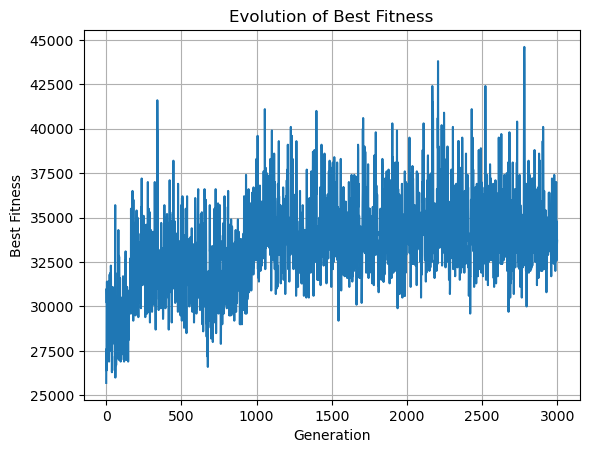


Best seating plan:
Table 1: [10, 15, 5, 46, 30, 27, 50, 7]
Table 2: [57, 59, 56, 55, 24, 62, 38, 41]
Table 3: [18, 54, 17, 20, 21, 16, 25, 35]
Table 4: [53, 13, 49, 0, 37, 43, 12, 1]
Table 5: [48, 47, 26, 36, 51, 3, 42, 40]
Table 6: [4, 19, 23, 33, 52, 14, 44, 29]
Table 7: [9, 39, 31, 32, 2, 22, 34, 45]
Table 8: [63, 61, 60, 58, 28, 11, 8, 6]
Best fitness across 20 runs: 80500


In [ ]:
ELITE_SIZE = 0

for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=inter_table_pair_swap_mutation,
        crossover_fn=crossover_table_based,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=tournament_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    #Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")

### Introduced Elistism with table based crossover

--- Run 1 ---
Generation 0: Best fitness = 24800
Generation 10: Best fitness = 32800
Generation 20: Best fitness = 34500
Generation 30: Best fitness = 36100
Generation 40: Best fitness = 36200
Generation 50: Best fitness = 38600
Generation 60: Best fitness = 41700
Generation 70: Best fitness = 42600
Generation 80: Best fitness = 42600
Generation 90: Best fitness = 42600
Generation 100: Best fitness = 43400
Generation 110: Best fitness = 44800
Generation 120: Best fitness = 46800
Generation 130: Best fitness = 46800
Generation 140: Best fitness = 46800
Generation 150: Best fitness = 46800
Generation 160: Best fitness = 46800
Generation 170: Best fitness = 46800
Generation 180: Best fitness = 46800
Generation 190: Best fitness = 46800
Generation 200: Best fitness = 47400
Generation 210: Best fitness = 47400
Generation 220: Best fitness = 47400
Generation 230: Best fitness = 47400
Generation 240: Best fitness = 48200
Generation 250: Best fitness = 48200
Generation 260: Best fitness = 4820

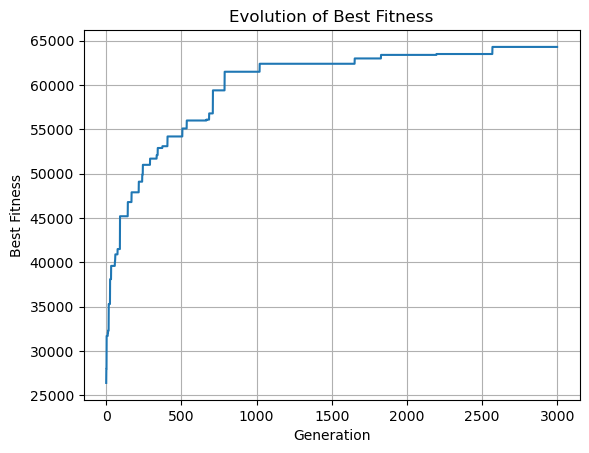


Best seating plan:
Table 1: [35, 21, 43, 37, 34, 59, 49, 27]
Table 2: [28, 46, 47, 50, 38, 45, 29, 30]
Table 3: [54, 62, 63, 52, 55, 61, 51, 60]
Table 4: [14, 2, 9, 3, 58, 12, 26, 13]
Table 5: [18, 53, 25, 19, 17, 5, 20, 16]
Table 6: [39, 56, 57, 44, 41, 33, 40, 42]
Table 7: [11, 1, 22, 23, 0, 15, 10, 24]
Table 8: [6, 7, 48, 8, 4, 32, 36, 31]
Best fitness across 20 runs: 80500


In [ ]:
ELITE_SIZE = int(0.02 * POP_SIZE) #2% of the population passes

for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=inter_table_pair_swap_mutation,
        crossover_fn=crossover_table_based,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=tournament_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    #Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")

### No elitism with uniform crossover

--- Run 1 ---
Generation 0: Best fitness = 26500
Generation 10: Best fitness = 25300
Generation 20: Best fitness = 29400
Generation 30: Best fitness = 38700
Generation 40: Best fitness = 40800
Generation 50: Best fitness = 44600
Generation 60: Best fitness = 45000
Generation 70: Best fitness = 45900
Generation 80: Best fitness = 47700
Generation 90: Best fitness = 50700
Generation 100: Best fitness = 51600
Generation 110: Best fitness = 53500
Generation 120: Best fitness = 54600
Generation 130: Best fitness = 55400
Generation 140: Best fitness = 62700
Generation 150: Best fitness = 62500
Generation 160: Best fitness = 61000
Generation 170: Best fitness = 63300
Generation 180: Best fitness = 64500
Generation 190: Best fitness = 65300
Generation 200: Best fitness = 65900
Generation 210: Best fitness = 67400
Generation 220: Best fitness = 68700
Generation 230: Best fitness = 70800
Generation 240: Best fitness = 71100
Generation 250: Best fitness = 71800
Generation 260: Best fitness = 6970

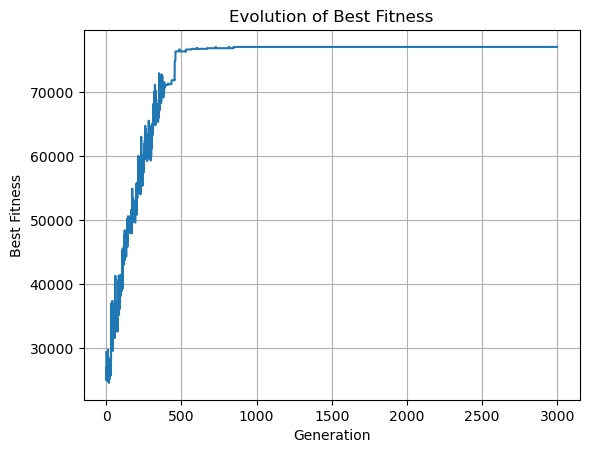


Best seating plan:
Table 1: [49, 43, 37, 0, 1, 53, 17, 21]
Table 2: [29, 28, 9, 30, 6, 7, 38, 8]
Table 3: [60, 61, 62, 25, 63, 27, 58, 26]
Table 4: [50, 47, 51, 46, 48, 52, 36, 45]
Table 5: [57, 54, 56, 34, 33, 55, 35, 59]
Table 6: [24, 23, 22, 40, 39, 41, 42, 4]
Table 7: [13, 10, 12, 11, 14, 2, 3, 44]
Table 8: [20, 32, 19, 5, 31, 15, 16, 18]
Best fitness across 20 runs: 80500


In [ ]:
ELITE_SIZE = 0

for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=inter_table_pair_swap_mutation,
        crossover_fn=uniform_guest_crossover,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=tournament_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    #Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")

### Introduced Elitism with Uniform crossover

--- Run 1 ---
Generation 0: Best fitness = 26300
Generation 10: Best fitness = 34000
Generation 20: Best fitness = 34000
Generation 30: Best fitness = 34200
Generation 40: Best fitness = 34200
Generation 50: Best fitness = 35900
Generation 60: Best fitness = 42000
Generation 70: Best fitness = 42000
Generation 80: Best fitness = 44300
Generation 90: Best fitness = 44300
Generation 100: Best fitness = 48200
Generation 110: Best fitness = 48200
Generation 120: Best fitness = 50200
Generation 130: Best fitness = 52600
Generation 140: Best fitness = 54700
Generation 150: Best fitness = 57300
Generation 160: Best fitness = 58400
Generation 170: Best fitness = 60100
Generation 180: Best fitness = 63300
Generation 190: Best fitness = 64500
Generation 200: Best fitness = 65000
Generation 210: Best fitness = 65100
Generation 220: Best fitness = 65400
Generation 230: Best fitness = 65400
Generation 240: Best fitness = 65700
Generation 250: Best fitness = 66600
Generation 260: Best fitness = 6670

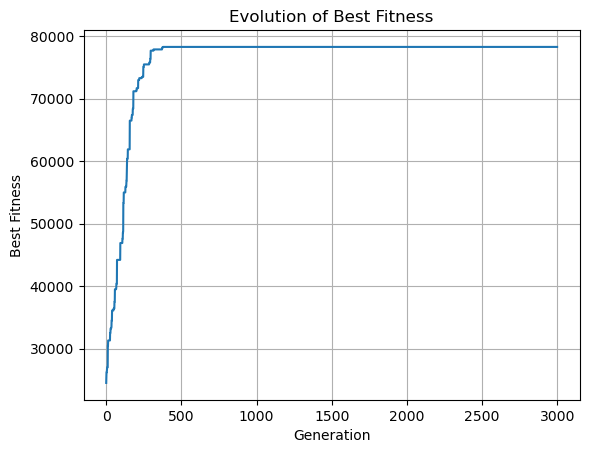


Best seating plan:
Table 1: [58, 28, 61, 30, 29, 62, 63, 60]
Table 2: [0, 1, 17, 21, 23, 24, 4, 22]
Table 3: [35, 8, 9, 3, 6, 34, 2, 7]
Table 4: [20, 18, 16, 19, 26, 5, 25, 15]
Table 5: [12, 41, 40, 39, 42, 38, 13, 14]
Table 6: [47, 46, 48, 57, 56, 45, 54, 55]
Table 7: [32, 49, 33, 31, 43, 37, 59, 36]
Table 8: [51, 53, 52, 44, 50, 11, 10, 27]
Best fitness across 20 runs: 80500


In [ ]:
ELITE_SIZE = int(0.02 * POP_SIZE) #2% of the population passes

for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=inter_table_pair_swap_mutation,
        crossover_fn=uniform_guest_crossover,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=tournament_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    #Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")

## Greedy local replacement mutation

### No elitism with table based crossover

--- Run 1 ---
Generation 0: Best fitness = 24200
Generation 10: Best fitness = 30700
Generation 20: Best fitness = 35100
Generation 30: Best fitness = 36200
Generation 40: Best fitness = 36900
Generation 50: Best fitness = 35800
Generation 60: Best fitness = 37600
Generation 70: Best fitness = 36100
Generation 80: Best fitness = 34300
Generation 90: Best fitness = 35000
Generation 100: Best fitness = 38200
Generation 110: Best fitness = 37000
Generation 120: Best fitness = 40700
Generation 130: Best fitness = 37000
Generation 140: Best fitness = 35300
Generation 150: Best fitness = 43700
Generation 160: Best fitness = 37600
Generation 170: Best fitness = 36000
Generation 180: Best fitness = 37600
Generation 190: Best fitness = 38300
Generation 200: Best fitness = 39000
Generation 210: Best fitness = 37100
Generation 220: Best fitness = 36500
Generation 230: Best fitness = 37800
Generation 240: Best fitness = 35100
Generation 250: Best fitness = 38500
Generation 260: Best fitness = 3850

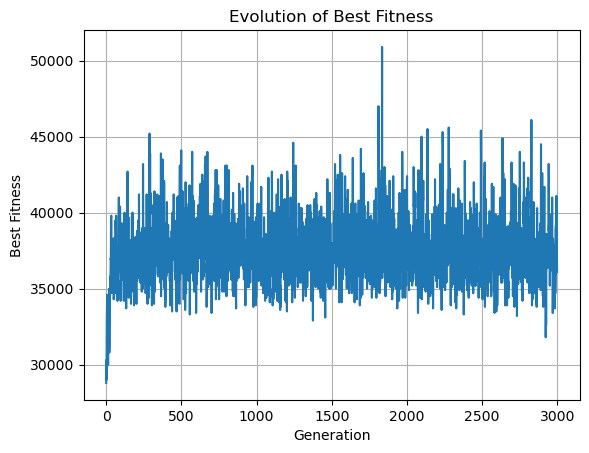


Best seating plan:
Table 1: [37, 43, 25, 34, 49, 32, 29, 44]
Table 2: [57, 38, 33, 35, 8, 24, 23, 42]
Table 3: [1, 5, 17, 22, 16, 15, 4, 0]
Table 4: [19, 52, 36, 20, 61, 46, 18, 60]
Table 5: [58, 26, 59, 11, 53, 21, 39, 48]
Table 6: [41, 47, 56, 63, 10, 2, 12, 14]
Table 7: [28, 31, 6, 50, 27, 30, 45, 62]
Table 8: [55, 7, 54, 40, 51, 9, 13, 3]
Best fitness across 20 runs: 80500


In [ ]:
ELITE_SIZE = 0

for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=greedy_wrapper,
        crossover_fn=crossover_table_based,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=tournament_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    #Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")

### Elitism with table based crossover

--- Run 1 ---
Generation 0: Best fitness = 26100
Generation 10: Best fitness = 35400
Generation 20: Best fitness = 37400
Generation 30: Best fitness = 38700
Generation 40: Best fitness = 40900
Generation 50: Best fitness = 42500
Generation 60: Best fitness = 43700
Generation 70: Best fitness = 46600
Generation 80: Best fitness = 46600
Generation 90: Best fitness = 47500
Generation 100: Best fitness = 47500
Generation 110: Best fitness = 50800
Generation 120: Best fitness = 50800
Generation 130: Best fitness = 50800
Generation 140: Best fitness = 52200
Generation 150: Best fitness = 52200
Generation 160: Best fitness = 55700
Generation 170: Best fitness = 56000
Generation 180: Best fitness = 56000
Generation 190: Best fitness = 56000
Generation 200: Best fitness = 56900
Generation 210: Best fitness = 56900
Generation 220: Best fitness = 58500
Generation 230: Best fitness = 58500
Generation 240: Best fitness = 58500
Generation 250: Best fitness = 58500
Generation 260: Best fitness = 5850

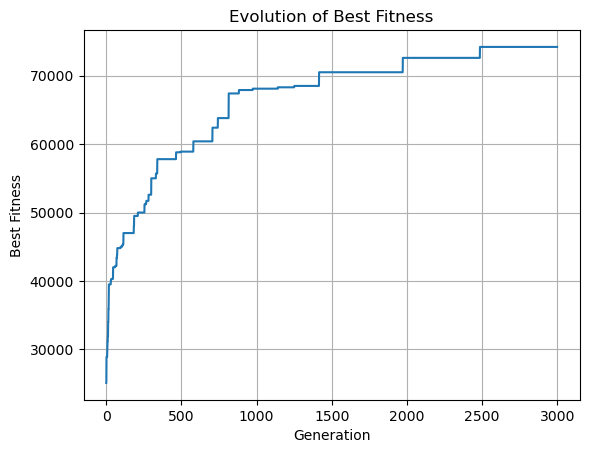


Best seating plan:
Table 1: [14, 12, 51, 59, 52, 50, 13, 44]
Table 2: [4, 26, 15, 16, 17, 5, 25, 27]
Table 3: [2, 8, 33, 7, 6, 45, 3, 9]
Table 4: [63, 61, 62, 60, 41, 58, 55, 54]
Table 5: [29, 47, 28, 30, 35, 36, 34, 46]
Table 6: [56, 42, 23, 22, 39, 24, 57, 40]
Table 7: [49, 21, 19, 0, 53, 37, 1, 43]
Table 8: [18, 11, 48, 38, 32, 10, 20, 31]
Best fitness across 20 runs: 80500


In [ ]:
ELITE_SIZE = int(0.02 * POP_SIZE) #2% of the population passes

for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=greedy_wrapper,
        crossover_fn=crossover_table_based,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=tournament_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    #Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")

### No Elitism with uniform crossover

--- Run 1 ---
Generation 0: Best fitness = 26200
Generation 10: Best fitness = 27200
Generation 20: Best fitness = 28200
Generation 30: Best fitness = 31800
Generation 40: Best fitness = 32300
Generation 50: Best fitness = 39200
Generation 60: Best fitness = 40100
Generation 70: Best fitness = 40300
Generation 80: Best fitness = 41900
Generation 90: Best fitness = 48800
Generation 100: Best fitness = 49000
Generation 110: Best fitness = 50100
Generation 120: Best fitness = 51900
Generation 130: Best fitness = 51800
Generation 140: Best fitness = 50000
Generation 150: Best fitness = 51800
Generation 160: Best fitness = 52300
Generation 170: Best fitness = 54900
Generation 180: Best fitness = 56200
Generation 190: Best fitness = 56600
Generation 200: Best fitness = 58200
Generation 210: Best fitness = 60300
Generation 220: Best fitness = 62600
Generation 230: Best fitness = 63500
Generation 240: Best fitness = 67000
Generation 250: Best fitness = 68400
Generation 260: Best fitness = 6700

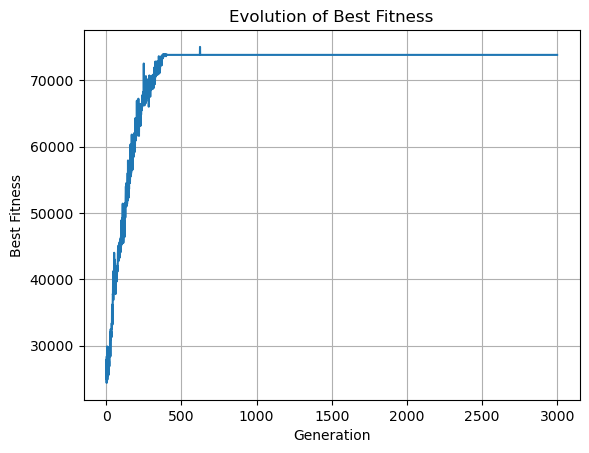


Best seating plan:
Table 1: [0, 27, 17, 15, 1, 16, 4, 5]
Table 2: [6, 3, 7, 8, 2, 11, 10, 9]
Table 3: [42, 39, 40, 41, 38, 35, 34, 58]
Table 4: [29, 28, 30, 31, 32, 43, 37, 49]
Table 5: [61, 62, 63, 60, 26, 25, 53, 21]
Table 6: [12, 23, 13, 36, 24, 59, 22, 44]
Table 7: [51, 52, 50, 20, 19, 18, 14, 33]
Table 8: [56, 57, 48, 46, 45, 54, 55, 47]
Best fitness across 20 runs: 80500


In [ ]:
ELITE_SIZE = 0

for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=greedy_wrapper,
        crossover_fn=uniform_guest_crossover,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=tournament_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    #Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")

### Elistim with uniform crossover

--- Run 1 ---
Generation 0: Best fitness = 25400
Generation 10: Best fitness = 29200
Generation 20: Best fitness = 33200
Generation 30: Best fitness = 36000
Generation 40: Best fitness = 37400
Generation 50: Best fitness = 37400
Generation 60: Best fitness = 40300
Generation 70: Best fitness = 40300
Generation 80: Best fitness = 42500
Generation 90: Best fitness = 43000
Generation 100: Best fitness = 43000
Generation 110: Best fitness = 44600
Generation 120: Best fitness = 44600
Generation 130: Best fitness = 47100
Generation 140: Best fitness = 47100
Generation 150: Best fitness = 48900
Generation 160: Best fitness = 48900
Generation 170: Best fitness = 48900
Generation 180: Best fitness = 53000
Generation 190: Best fitness = 53000
Generation 200: Best fitness = 53000
Generation 210: Best fitness = 53000
Generation 220: Best fitness = 56200
Generation 230: Best fitness = 56200
Generation 240: Best fitness = 59200
Generation 250: Best fitness = 60200
Generation 260: Best fitness = 6510

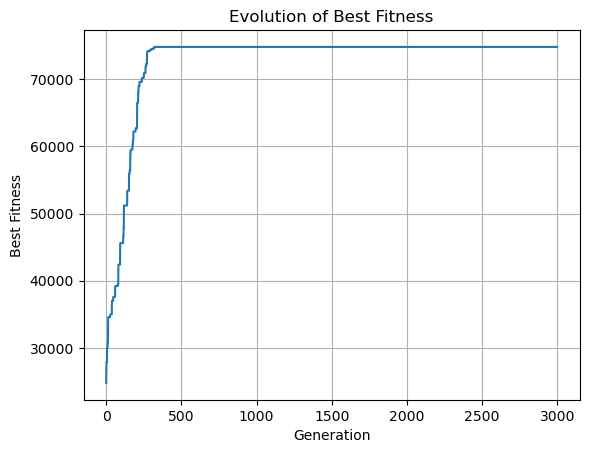


Best seating plan:
Table 1: [62, 0, 61, 63, 60, 53, 1, 49]
Table 2: [57, 55, 40, 56, 54, 41, 39, 42]
Table 3: [51, 50, 52, 8, 3, 6, 7, 2]
Table 4: [15, 4, 17, 24, 22, 21, 23, 16]
Table 5: [34, 46, 47, 35, 29, 28, 45, 30]
Table 6: [14, 25, 12, 26, 13, 5, 27, 48]
Table 7: [43, 37, 58, 32, 33, 36, 59, 31]
Table 8: [20, 19, 18, 38, 10, 11, 44, 9]
Best fitness across 20 runs: 80600


In [ ]:
ELITE_SIZE = int(0.02 * POP_SIZE) #2% of the population passes

for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=greedy_wrapper,
        crossover_fn=uniform_guest_crossover,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=tournament_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    #Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")